### How Human Freedom affects World Happiness?

This project aims to explore the relationship between world happiness and human freedom

Datasets are extracted from: 
    1- Human Freedom Dataset: https://www.kaggle.com/gsutters/the-human-freedom-index
    2- World Happiness Dataset:https://www.kaggle.com/unsdsn/world-happiness#2017.csv
The project is divided into sections:

    1- EDA (Exploratory Data Analysis)
        1.a: Human Freedom Dataset
            1.a.1 Data Exploratory
            1.a.2 Preprocssing
            1.a.3 Target Feature Extraction
        1.b World Happiness Dataset
            1.b.1 Data Exploratory
            1.b.2 Preprocssing
            1.b.3 Target Feature Extraction
        
     2- Data Vizualization

In [1]:
#import packages and scripts
from IPython.core.display import HTML
from string import Template
import pandas as pd
import os
import json, random
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
#get the d3 host remotely
HTML('<script src=https://d3js.org/d3.v4.min.js></script>')


In [2]:
HTML('''<h1>Data Viz</h1>''')

In [3]:
os.getcwd()

'/Users/skydiver/Desktop/viz'

### Data Exploratory

In [4]:
#call data
hmn_frdm= pd.read_csv("hf.csv")
wrld_hpns=pd.read_csv("wh.csv")

#### Human Freedom Dataset

The Human Freedom Index measures economic freedoms such as the freedom to trade or to use sound money, and it captures the degree to which people are free to enjoy the major freedoms often referred to as civil liberties—freedom of speech, religion, association, and assembly— in the countries in the survey. In addition, it includes indicators on rule of law, crime and violence, freedom of movement, and legal discrimination against same-sex relationships. We also include nine variables pertaining to women-specific freedoms that are found in various categories of the index.[1]
[1]: Ian Vásquez and Tanja Porčnik, The Human Freedom Index 2018: A Global Measurement of Personal, Civil, and Economic Freedom (Washington: Cato Institute, Fraser Institute, and the Friedrich Naumann Foundation for Freedom, 2018).

In [5]:
hmn_frdm.head()

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


In [6]:
hmn_frdm.shape

(1458, 123)

In [7]:
hmn_frdm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Columns: 123 entries, year to hf_quartile
dtypes: float64(119), int64(1), object(3)
memory usage: 1.4+ MB


There are many columns in the dataset that prevented the function above to fetch it all

In [8]:
hmn_frdm.describe()

,year,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
count,1458.000000,880.000000,880.000000,880.000000,1378.000000,1378.000000,1369.000000,1378.000000,1279.000000,1378.000000,...,1283.000000,1357.000000,1368.000000,1374.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,2012.000000,5.589355,5.474770,5.044070,5.309641,7.412980,8.341855,9.519458,6.772869,9.584972,...,4.886192,7.698494,6.981858,6.317668,7.019782,6.785610,76.973149,6.993444,77.007983,2.490566
std,2.582875,2.080957,1.428494,1.724886,1.529310,2.832947,3.225902,1.744673,2.768983,1.559826,...,1.889168,1.728507,1.979200,1.230988,1.027625,0.883601,44.540142,1.025811,44.506549,1.119698
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.009841,2.483540,2.880000,1.000000,3.765827,1.000000,1.000000
25%,2010.000000,4.133333,4.549550,3.789724,4.131746,6.386978,10.000000,10.000000,5.000000,9.942607,...,3.433786,6.874687,6.368178,5.591851,6.429498,6.250000,38.000000,6.336685,39.000000,1.000000
50%,2012.000000,5.300000,5.300000,4.575189,4.910797,8.638278,10.000000,10.000000,7.500000,10.000000,...,4.418371,8.074161,7.466692,6.265234,7.082075,6.900000,77.000000,6.923840,76.000000,2.000000
75%,2014.000000,7.389499,6.410975,6.400000,6.513178,9.454402,10.000000,10.000000,10.000000,10.000000,...,6.227978,8.991882,8.209310,7.139718,7.720955,7.410000,115.000000,7.894660,115.000000,3.000000
max,2016.000000,9.700000,8.773533,8.719848,8.723094,9.926568,10.000000,10.000000,10.000000,10.000000,...,9.623811,9.999638,9.865488,9.272600,9.439828,9.190000,162.000000,9.126313,162.000000,4.000000


from above the dataset covers data from year 2008 to 2016  

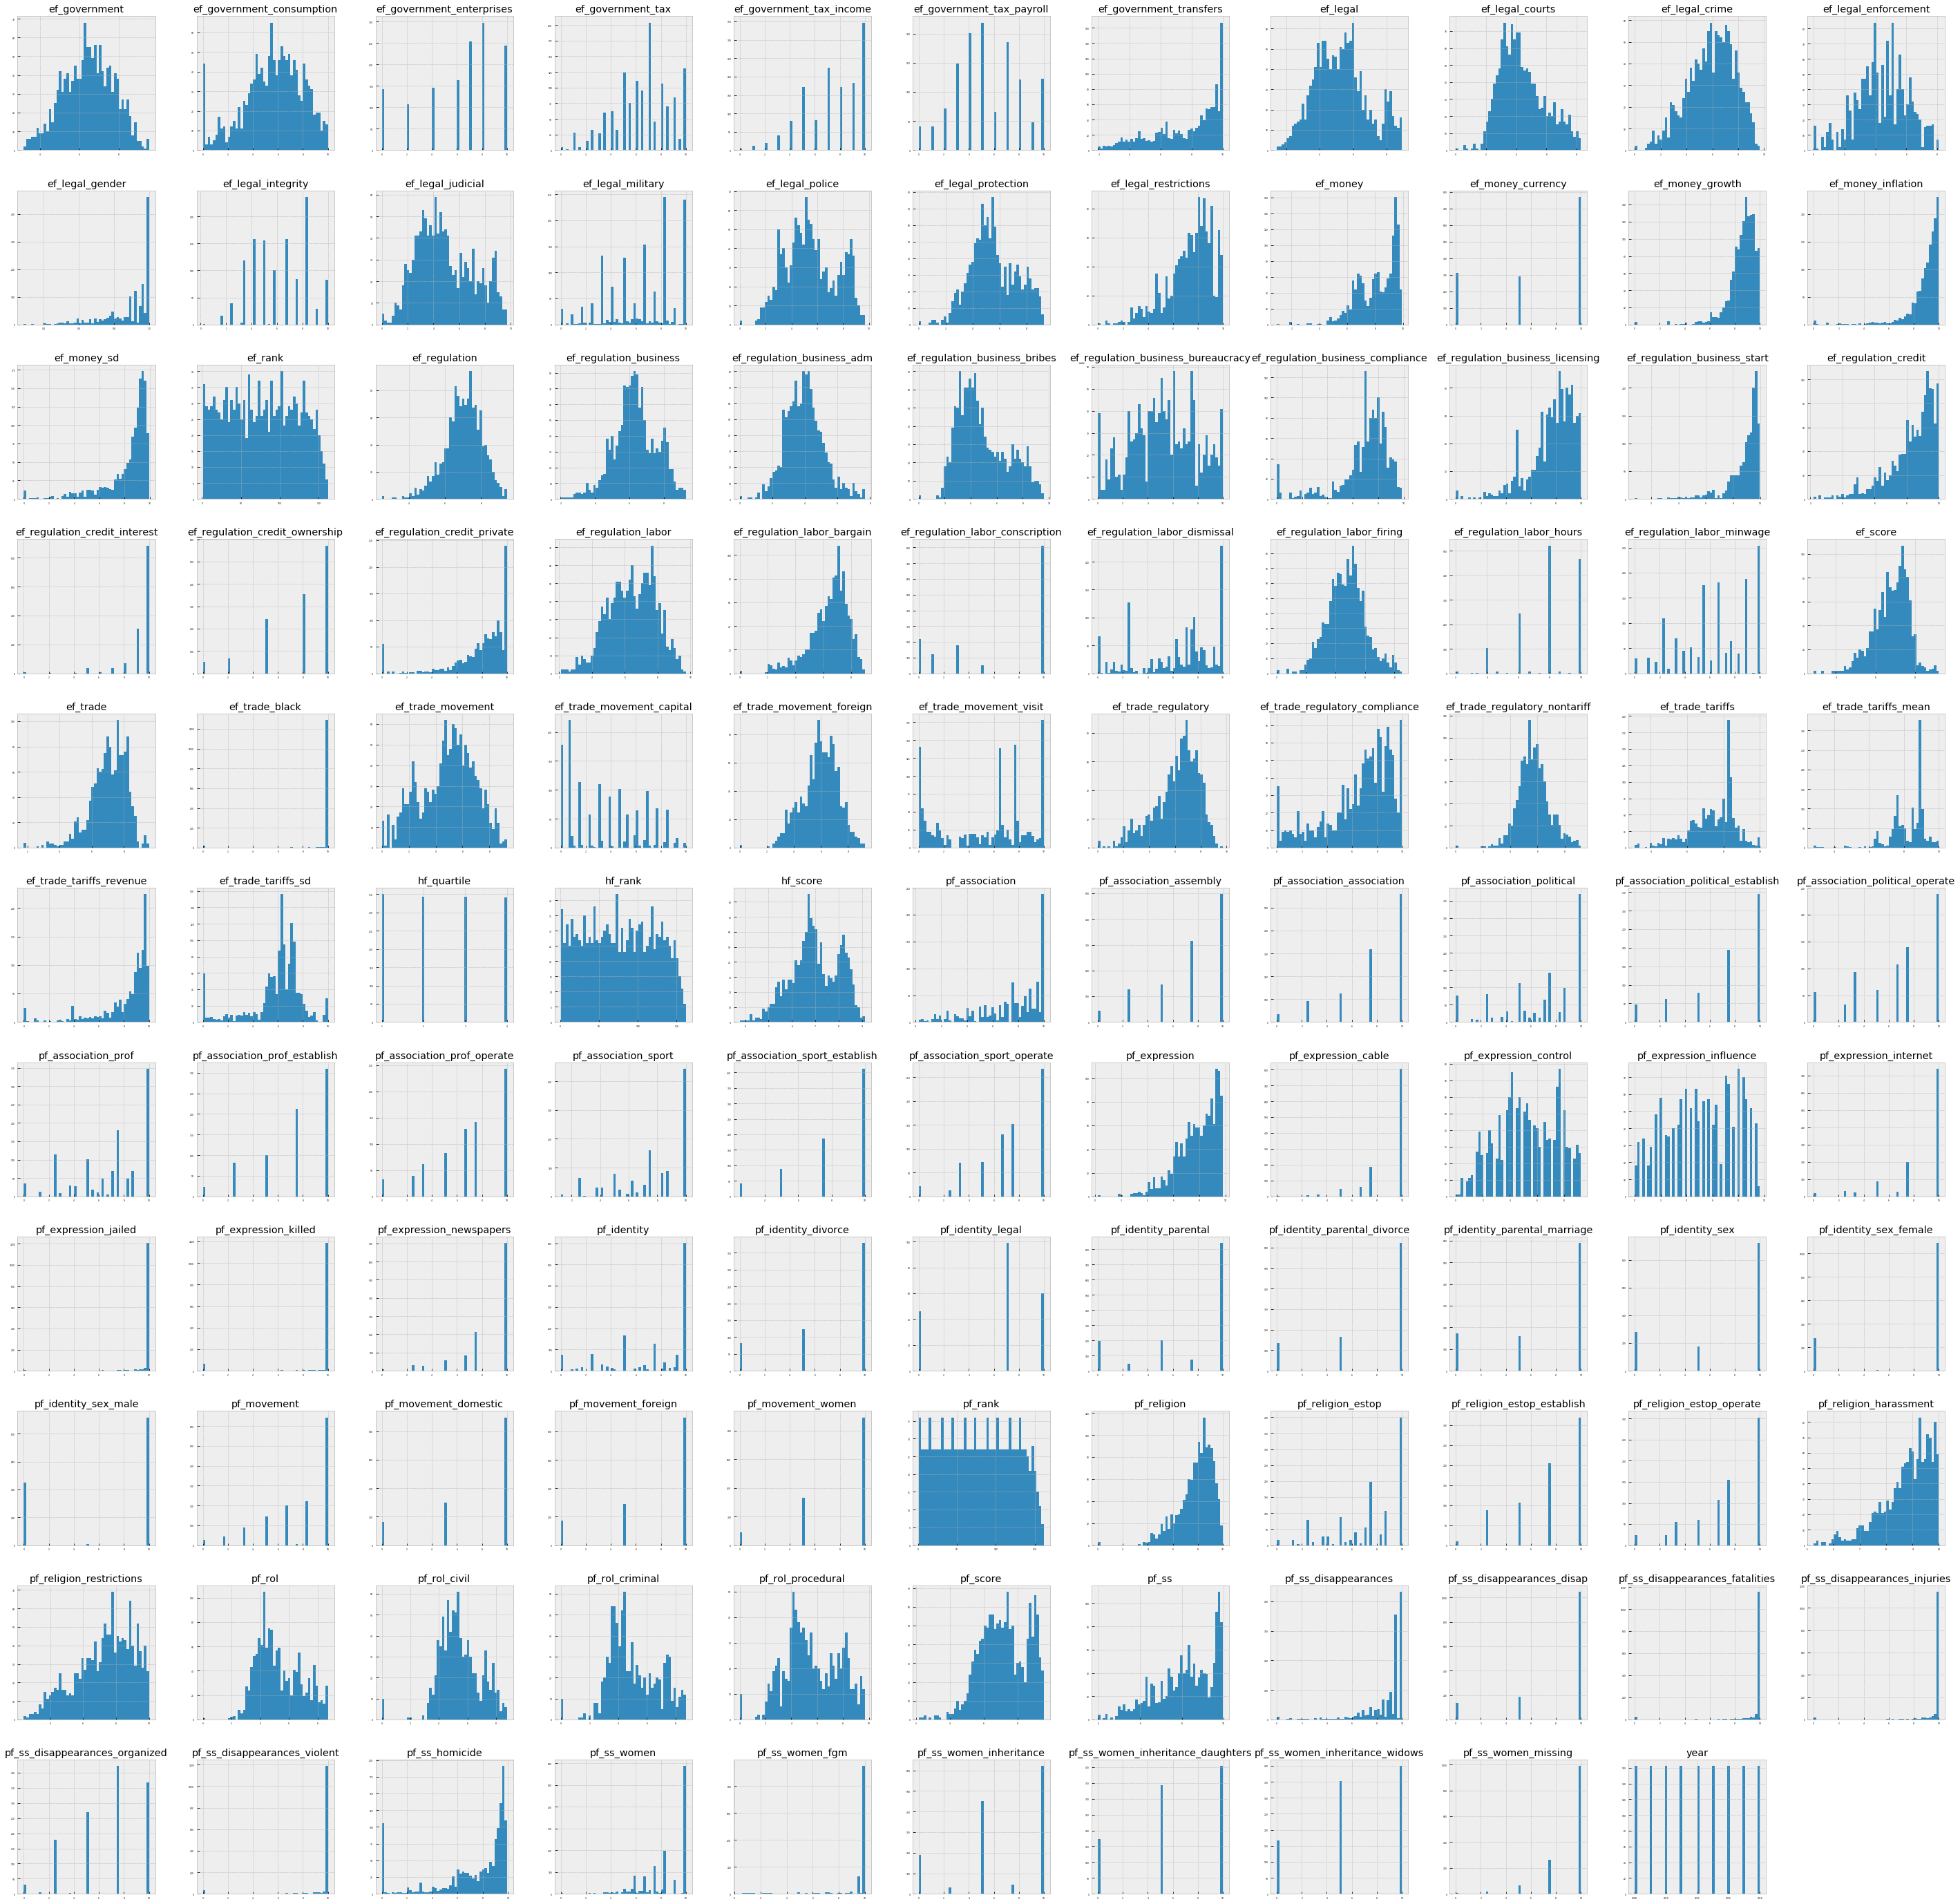

In [9]:
#select only numerical data from the data frame and check the distribution
df_num = hmn_frdm.select_dtypes(include = ['float64', 'int64'])
#df_num.head()
# We will explore the the distribution of the numerical data in the data set
df_num.hist(figsize=(50, 50), bins=50, xlabelsize=3, ylabelsize=3);

##### Preprocessing

In [10]:
hmn_frdm.columns

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

In [11]:
#check the percentatage of NAs in every column
na = hmn_frdm.isnull().sum()/len(hmn_frdm)
#filter columns with NA above 0.3 of the data
na_3 = na[na>0.3]
#delete columns with NA above 0.3 of the data
for ind in na_3.index:
    del hmn_frdm[ind]
    #double check if NAs were removed
na_after = hmn_frdm.isnull().sum()/len(hmn_frdm)
#check if there are still columns with NA above 0.3 of the data
na_after_3 = na_after[na_after>0.3]
na_after_3.index

Index([], dtype='object')

In [12]:
hmn_frdm.shape

(1458, 106)

In [13]:
(hmn_frdm.mean())

year                                  2012.000000
pf_rol                                   5.309641
pf_ss_homicide                           7.412980
pf_ss_disappearances_disap               8.341855
pf_ss_disappearances_violent             9.519458
pf_ss_disappearances_organized           6.772869
pf_ss_disappearances_fatalities          9.584972
pf_ss_disappearances_injuries            9.598734
pf_ss_disappearances                     8.811573
pf_ss_women_fgm                          9.237247
pf_ss_women_missing                      9.125561
pf_ss_women_inheritance                  6.635549
pf_ss_women                              8.331701
pf_ss                                    8.181087
pf_movement_domestic                     7.702206
pf_movement_foreign                      7.676471
pf_movement_women                        8.044799
pf_movement                              7.823537
pf_religion_estop                        7.448701
pf_religion_harassment                   8.781535


the number of columns shrinked to 106 columns, I will now fill the NAs of the rest of the columns with less than 0.3 NAs

In [14]:
#fill NA with mean value
hf_df_new = hmn_frdm.fillna(hmn_frdm.mean(),axis=0)
hf_df_new.isnull().sum()

year                                  0
ISO_code                              0
countries                             0
region                                0
pf_rol                                0
pf_ss_homicide                        0
pf_ss_disappearances_disap            0
pf_ss_disappearances_violent          0
pf_ss_disappearances_organized        0
pf_ss_disappearances_fatalities       0
pf_ss_disappearances_injuries         0
pf_ss_disappearances                  0
pf_ss_women_fgm                       0
pf_ss_women_missing                   0
pf_ss_women_inheritance               0
pf_ss_women                           0
pf_ss                                 0
pf_movement_domestic                  0
pf_movement_foreign                   0
pf_movement_women                     0
pf_movement                           0
pf_religion_estop                     0
pf_religion_harassment                0
pf_religion_restrictions              0
pf_religion                           0


In [15]:
hf_df_new.head()

,year,ISO_code,countries,region,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,5.291752,8.920429,10.0,10.00000,10.0,10.000000,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,3.819566,9.456254,10.0,9.29403,5.0,9.926119,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,3.451814,8.060260,5.0,10.00000,7.5,10.000000,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,5.744791,7.622974,10.0,10.00000,7.5,10.000000,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,5.003205,8.808750,10.0,10.00000,7.5,9.316196,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


next I will divide class to high, medium and low

In [16]:
import numpy as np
hf_df_new['class_high'] = np.where(hf_df_new['hf_score']>7 , "High",0)
hf_df_new['class_low'] = np.where(hf_df_new['hf_score']<5.5 , "Low",0)
hf_df_new['Class'] = hf_df_new['class_high'].str.cat(hf_df_new['class_low'], sep=' - ')
hf_df_new.head(10)
hf_df_new = hf_df_new.replace(['0 - 0', 'High - 0','0 - Low'], 
                     ['Med','High','Low']) 
hf_df_new['Class'].value_counts()

Med     687
High    649
Low     122
Name: Class, dtype: int64

In [17]:
#delete redundant columns
del hf_df_new['class_high']
del hf_df_new['class_low']
hf_df_new.head()

,year,ISO_code,countries,region,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,...,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile,Class
0,2016,ALB,Albania,Eastern Europe,5.291752,8.920429,10.0,10.00000,10.0,10.000000,...,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0,High
1,2016,DZA,Algeria,Middle East & North Africa,3.819566,9.456254,10.0,9.29403,5.0,9.926119,...,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0,Low
2,2016,AGO,Angola,Sub-Saharan Africa,3.451814,8.060260,5.0,10.00000,7.5,10.000000,...,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0,Med
3,2016,ARG,Argentina,Latin America & the Caribbean,5.744791,7.622974,10.0,10.00000,7.5,10.000000,...,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0,Med
4,2016,ARM,Armenia,Caucasus & Central Asia,5.003205,8.808750,10.0,10.00000,7.5,9.316196,...,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0,High


#### world happiness Dataset

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll.

In [18]:
#call data
wrld_hpns=pd.read_csv("wh.csv")
wrld_hpns.head(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


In [19]:
wrld_hpns.shape

(157, 13)

In [20]:
wrld_hpns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                          157 non-null object
Region                           157 non-null object
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.0+ KB


In [21]:
wrld_hpns.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


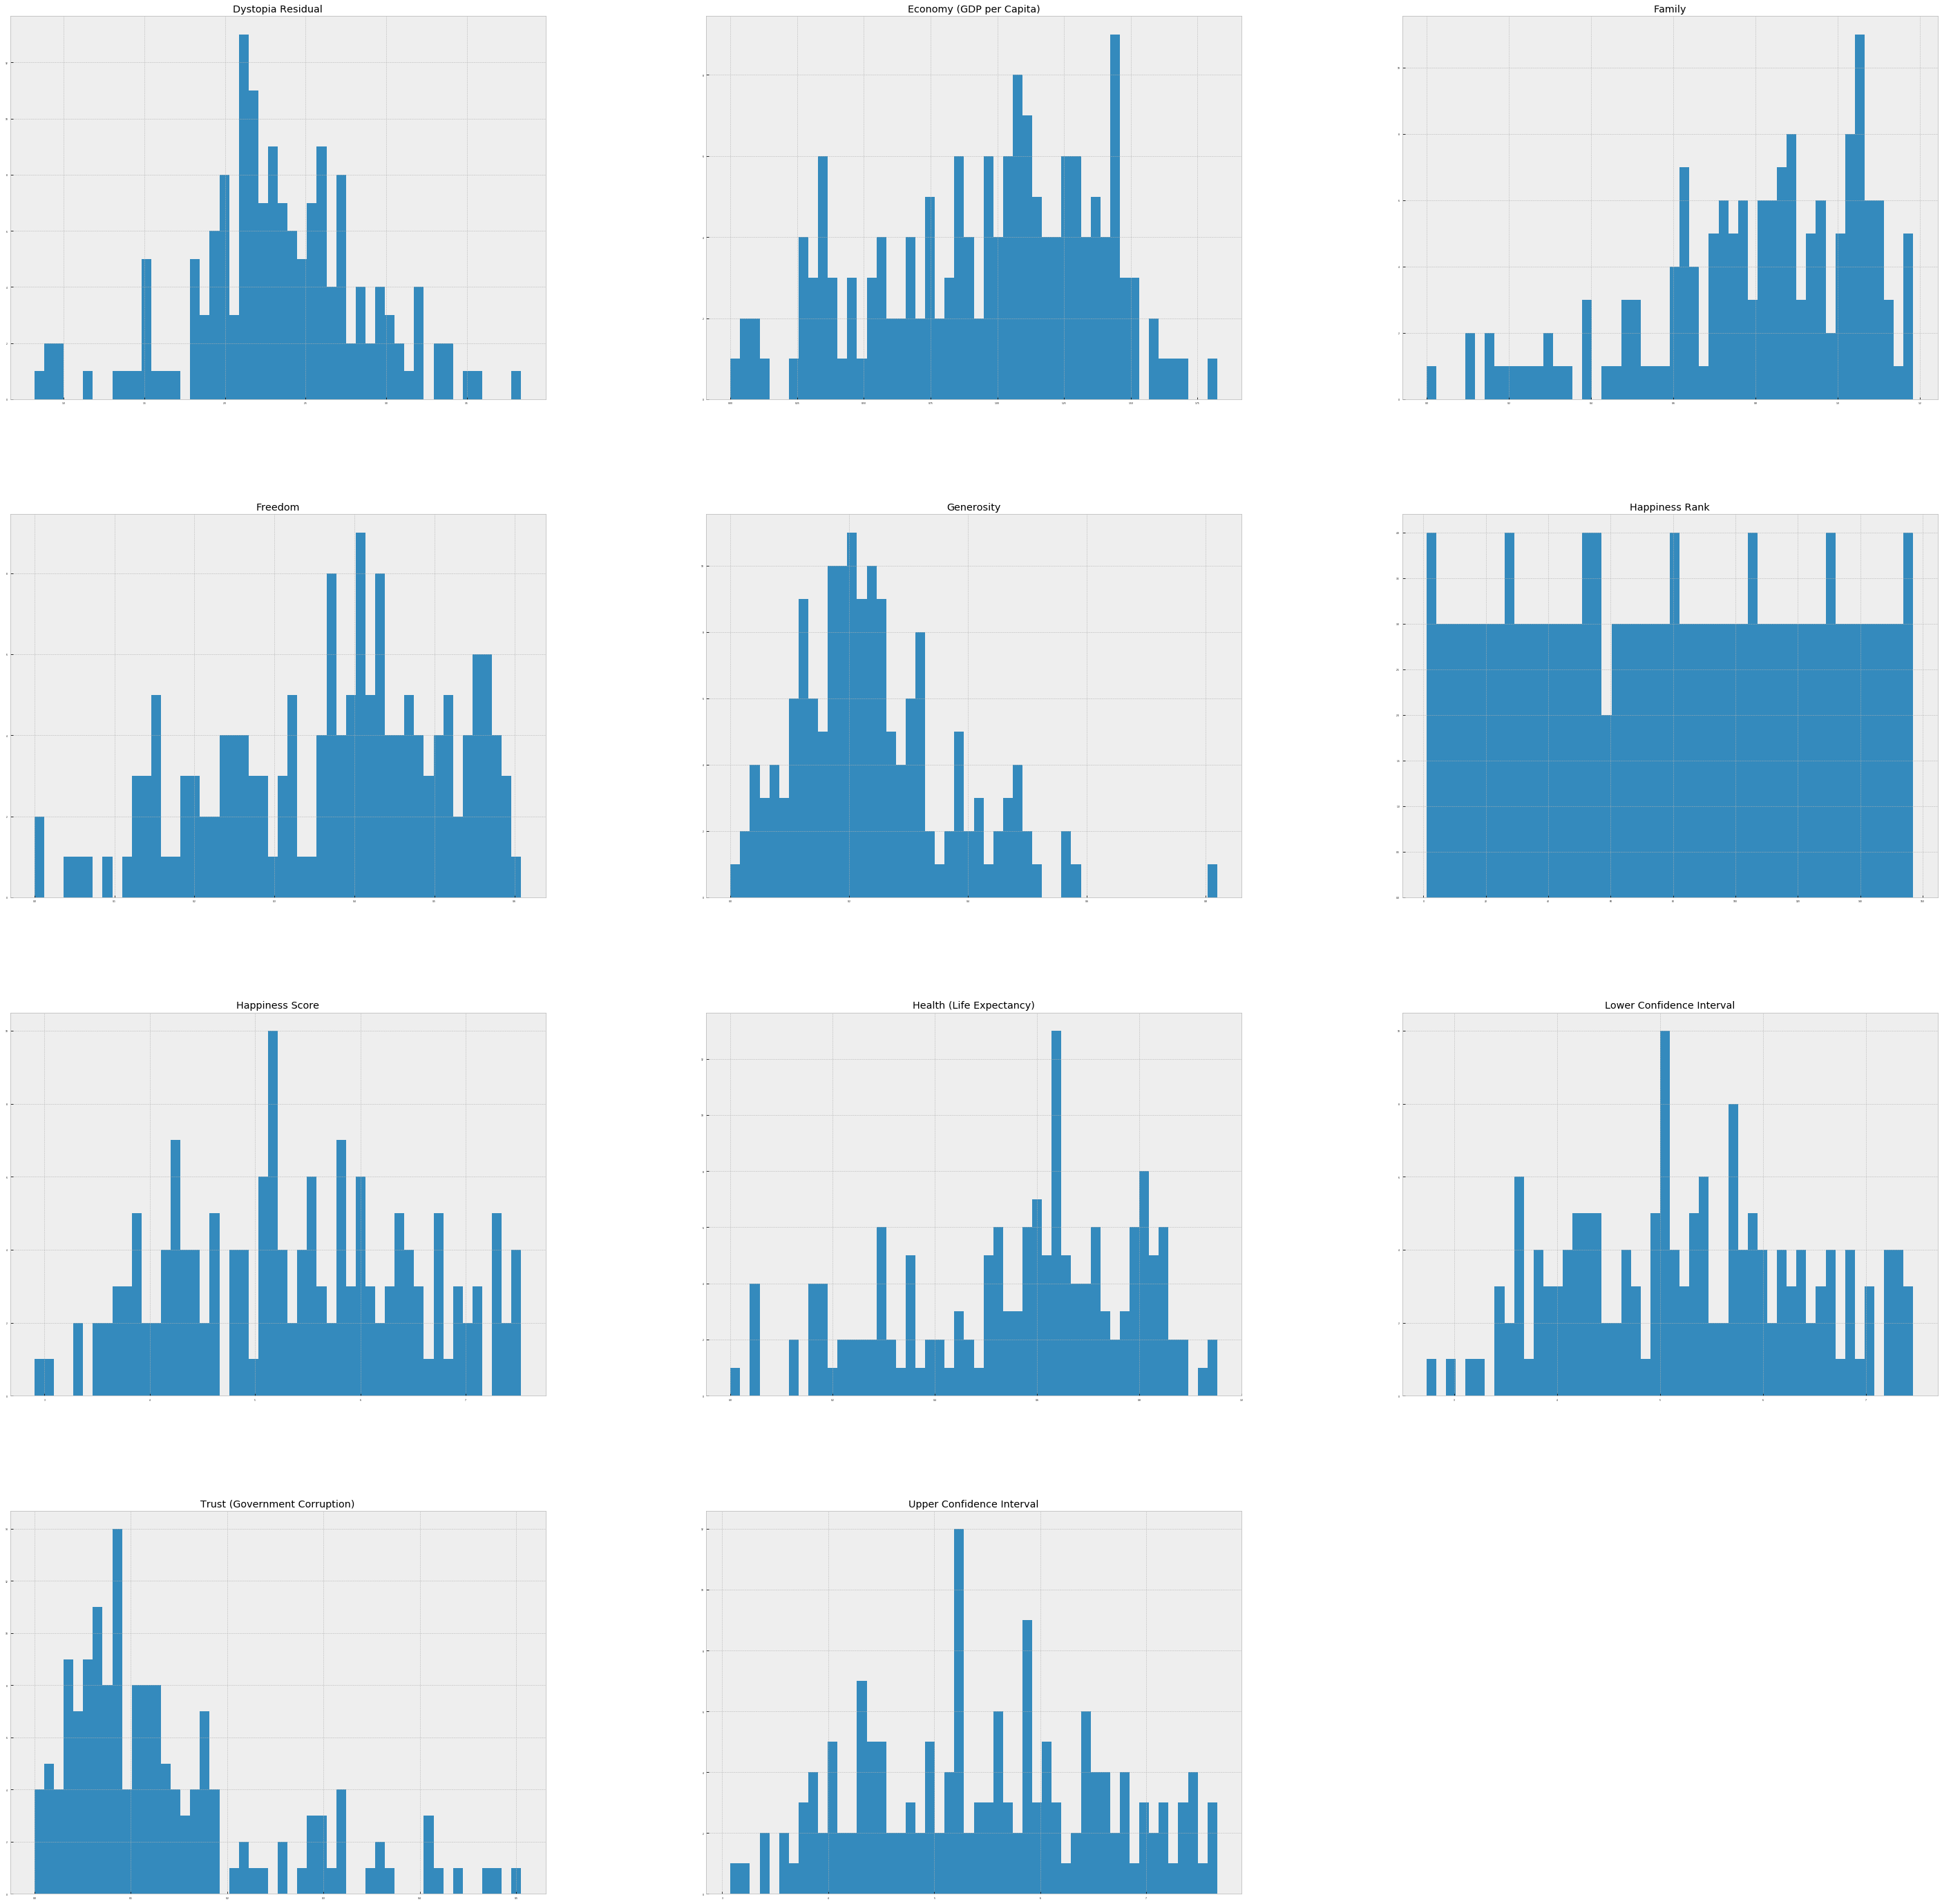

In [22]:
#select only numerical data from the data frame and check the distribution
wh_num = wrld_hpns.select_dtypes(include = ['float64', 'int64'])
#df_num.head()
# We will explore the the distribution of the numerical data in the data set
wh_num.hist(figsize=(50, 50), bins=50, xlabelsize=3, ylabelsize=3);

##### Preprocssing

In [23]:
wrld_hpns.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [24]:
#check the percentatage of NAs in every column
na_wh = wrld_hpns.isnull().sum()/len(wrld_hpns)
#filter columns with NA above 0.3 of the data
na_wh_3 = na_wh[na_wh>0.3]
#delete columns with NA above 0.3 of the data
for ind in na_wh_3.index:
    del wh_num[ind]
    #double check if NAs were removed
wh_na_after = wrld_hpns.isnull().sum()/len(wrld_hpns)
#check if there are still columns with NA above 0.3 of the data
wh_na_after_3 = wh_na_after[wh_na_after>0.3]
wh_na_after_3.index

Index([], dtype='object')

In [25]:
wrld_hpns.shape

(157, 13)

In [26]:
(wh_num.mean())

Happiness Rank                   78.980892
Happiness Score                   5.382185
Lower Confidence Interval         5.282395
Upper Confidence Interval         5.481975
Economy (GDP per Capita)          0.953880
Family                            0.793621
Health (Life Expectancy)          0.557619
Freedom                           0.370994
Trust (Government Corruption)     0.137624
Generosity                        0.242635
Dystopia Residual                 2.325807
dtype: float64

In [27]:
#fill NA with mean value
wh_df_new = wrld_hpns.fillna(wrld_hpns.mean(),axis=0)
wh_df_new.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [28]:
wh_df_new.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [29]:
import numpy as np
wh_df_new['class_high'] = np.where(wh_df_new['Happiness Score']>6.5 , "High",0)
wh_df_new['class_low'] = np.where(wh_df_new['Happiness Score']<5 , "Low",0)
wh_df_new['Class'] = wh_df_new['class_high'].str.cat(wh_df_new['class_low'], sep=' - ')
wh_df_new = wh_df_new.replace(['0 - 0', 'High - 0','0 - Low'], 
                     ['Med','High','Low']) 
wh_df_new['Class'].value_counts()

Med     70
Low     58
High    29
Name: Class, dtype: int64

In [30]:
#delete redundant columns
del wh_df_new['class_high']
del wh_df_new['class_low']

In [31]:
wh_df_new.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Class
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,High
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,High
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,High
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,High
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,High


In [32]:
HTML('''<h1>Export data in a dictionary form</h1>''')

In [33]:
import json

# D3 accepts dictionaries ,here I will convert data frame into dictionaries.
HF_array_of_dicts = hf_df_new.to_dict(orient='records')
WH_array_of_dicts = wh_df_new.to_dict(orient='records')
with open('HF_array_of_dicts.txt', 'w') as file:
     file.write(json.dumps(HF_array_of_dicts)) # use `json.loads` to do the reverse
with open('WH_array_of_dicts.txt', 'w') as file:
     file.write(json.dumps(WH_array_of_dicts)) # use `json.loads` to do the reverse


In [103]:
hf_df_new.to_csv('hf_df_new.csv',sep=',')
wh_df_new.to_csv('wh_df_new.csv',sep=',')